In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load data
customer = pd.read_csv('CustomerChurn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Inspect the dataset
print(customer.isnull().sum())
customer.info()
customer.describe()
print(customer.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   obj

In [5]:
# Convert categorical values -> ['gender','Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','MultipleLines','InternetService','OnlineBackup','TotalCharges']

catg_cols = ['gender','Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','MultipleLines','InternetService','OnlineBackup','TotalCharges']
le = LabelEncoder()
for col in catg_cols:
   customer[col] = le.fit_transform(customer[col])

## **Exploratory Data Analysis (EDA) with Visualizations**

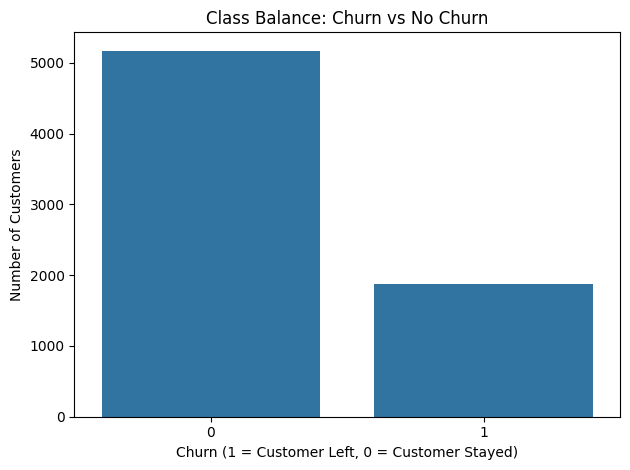

In [6]:
# Plot the count of customers by churn status (0 = stayed, 1 = left)
sns.countplot(data=customer,x='Churn')
plt.title('Class Balance: Churn vs No Churn')
plt.xlabel('Churn (1 = Customer Left, 0 = Customer Stayed)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

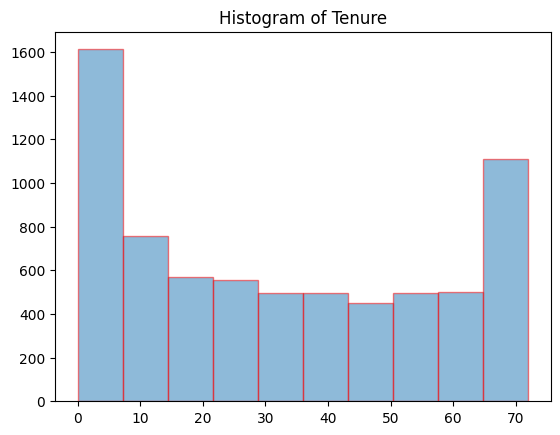

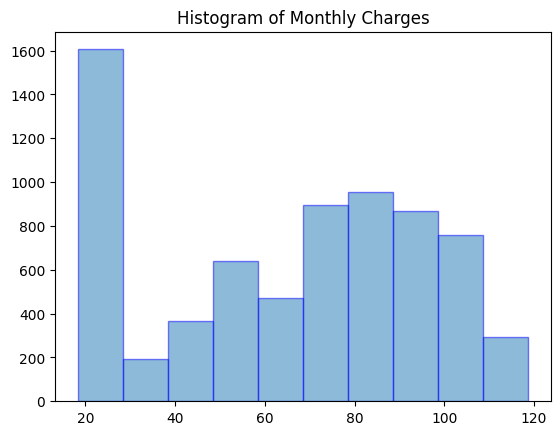

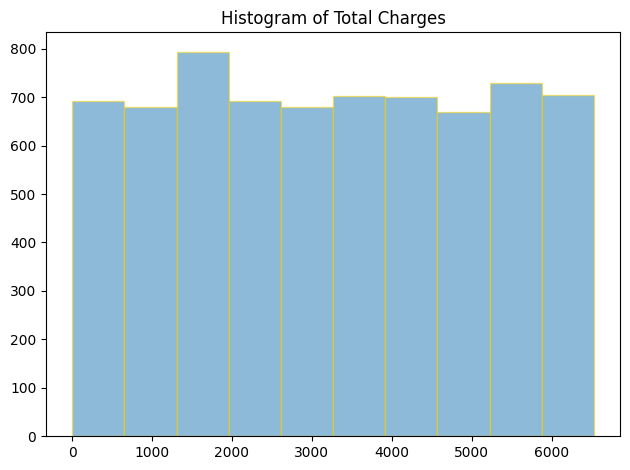

In [7]:
# Histogram of tenure, MonthlyCharges, TotalCharges
plt.figure(1)
plt.hist(customer['tenure'],bins=10,edgecolor='red',alpha=0.5)
plt.title("Histogram of Tenure")
plt.figure(2)
plt.hist(customer['MonthlyCharges'],bins=10,edgecolor='blue',alpha=0.5)
plt.title("Histogram of Monthly Charges")
plt.figure(3)
plt.hist(customer['TotalCharges'],bins=10,edgecolor='gold',alpha=0.5)
plt.title("Histogram of Total Charges")
plt.tight_layout()
plt.show()

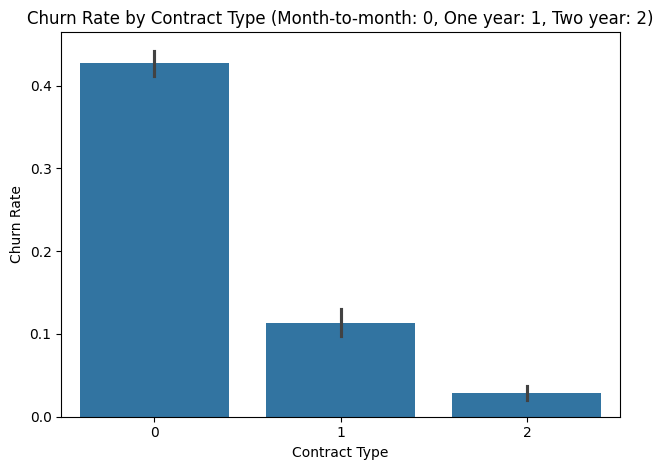

In [8]:
# Churn by Contract bar plot
sns.barplot(data=customer,x='Contract',y='Churn')
plt.title('Churn Rate by Contract Type (Month-to-month: 0, One year: 1, Two year: 2)')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

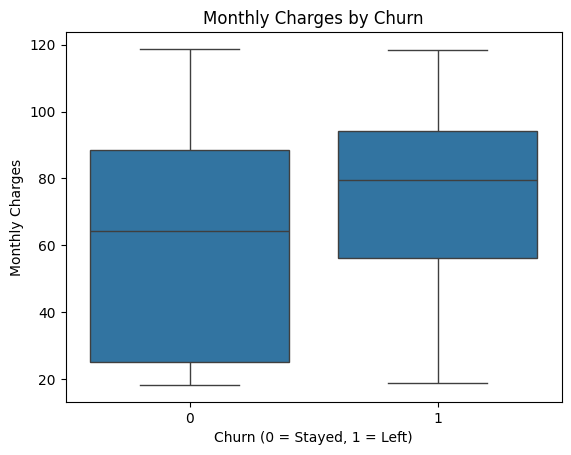

In [9]:
# Boxplots: MonthlyCharges vs Churn
sns.boxplot(data=customer,x='Churn',y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Monthly Charges")
plt.show()

# Model Creation

In [10]:
# Split feature and labels
X = customer.drop(['customerID','Churn'],axis = 1)
y = customer['Churn']

In [32]:
# data splitting process
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
# Find best Parameters for SVC model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C" : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['rbf']
}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [13]:
grid.fit(X_train,y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   2.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   1.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   1.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   1.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   1.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.741 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [38]:
# Create a model
svc_model = SVC(C = 100, gamma = 0.0001, kernel ='rbf')

# fit model
svc_model.fit(X_train,y_train)

SVC(C=100, gamma=0.0001)

In [39]:
# Make predictions
y_pred = svc_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve

acc = accuracy_score(y_test,y_pred)
y_pred_prob = svc_model.decision_function(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob)

In [42]:
print(f'Accuracy of model : {acc*100:.2f}%')
print(f'ROC AUC Score : {roc_auc:.4f}')

Accuracy of model : 78.99%
ROC AUC Score : 0.7875


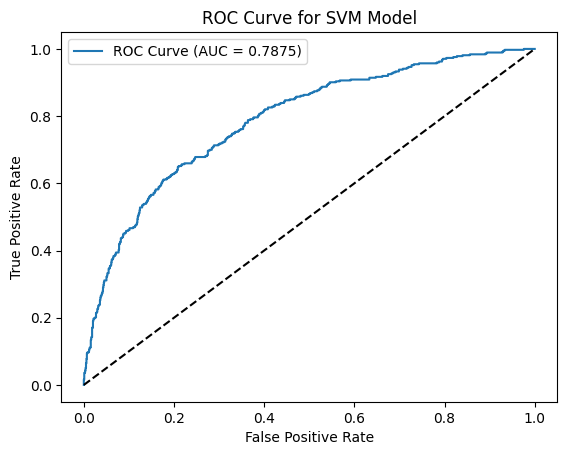

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Model")
plt.legend()
plt.show()